<a href="https://colab.research.google.com/github/Pratik94229/Time-Series/blob/main/Google_Stock_with_FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Installing yfinance and wget libraries
!pip install yfinance
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=6952900c5a474b0a71c34dad6498b95710f8b018e6282561425ebebe1a3b9b6c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# Defining the ticker symbol and time period
ticker = "GOOG"
start_date = "2015-01-01"
end_date = "2023-05-01"


In [ ]:
#For Data handling and manipulation
import pandas as pd
import numpy as np

#For downloading data from yfinace 
import yfinance as yf
import wget

#For time series analysis
import io, os, sys, setuptools, tokenize

#For creating model
from prophet import Prophet

#For plotting changeplot
from prophet.plot import add_changepoints_to_plot

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Downloading the data from Yahoo Finance
df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
#dataset first look
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800


In [ ]:
#checking rows and column
df.shape

(2095, 6)

In [ ]:
#creating copy
goog=df.copy()
goog.head(5)

In [ ]:
#checking end dates
goog.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,106.050003,107.320000,105.360001,106.779999,106.779999,21410900
2023-04-25,106.610001,107.440002,104.559998,104.610001,104.610001,31408100
2023-04-26,105.559998,107.019997,103.269997,104.449997,104.449997,37068200
2023-04-27,105.230003,109.150002,104.419998,108.370003,108.370003,38235200
2023-04-28,107.800003,108.290001,106.040001,108.220001,108.220001,23957900


In [ ]:
#selecting column for analysis
goog=goog[['Close']]

In [ ]:
#converting dataframe into format required by prophet
goog.columns=['y']

goog['ds']=goog.index

goog.head(5)

In [ ]:
#creating instance of prophet
m = Prophet()

#fitting model on 2 last year data
m.fit(goog.iloc[-252*2:])

#creating future dataframe
future = m.make_future_dataframe(periods=365)

# Making future predictions
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/el2hknha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/48dvjaug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21478', 'data', 'file=/tmp/tmps04dirab/el2hknha.json', 'init=/tmp/tmps04dirab/48dvjaug.json', 'output', 'file=/tmp/tmps04dirab/prophet_modelrizuqbzw/prophet_model-20230512041019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:10:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:10:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


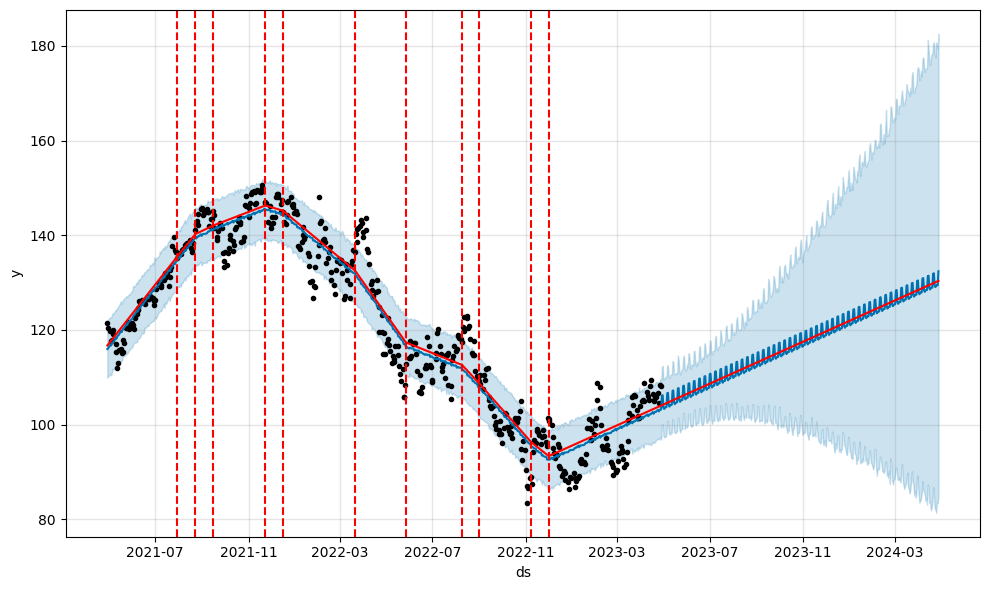

In [ ]:
#plotting forecasted value
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

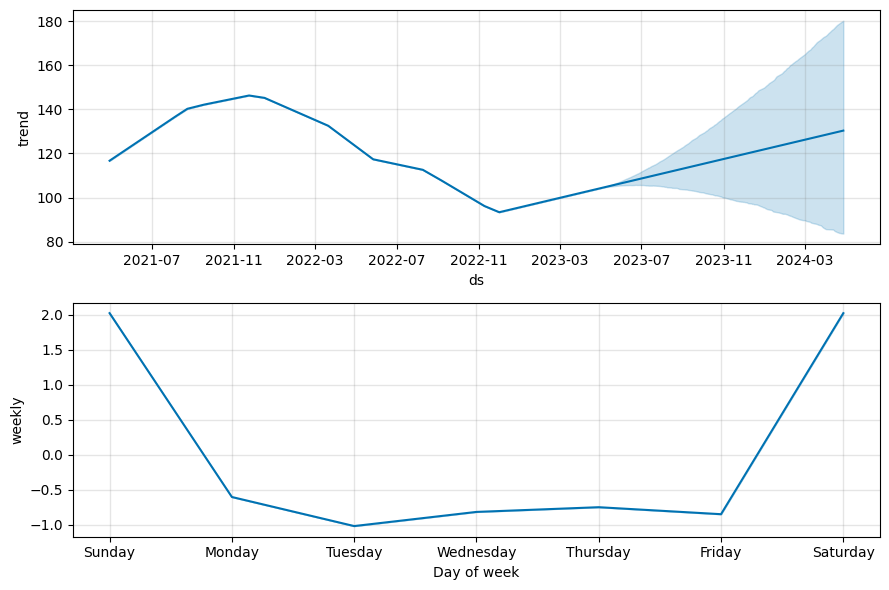

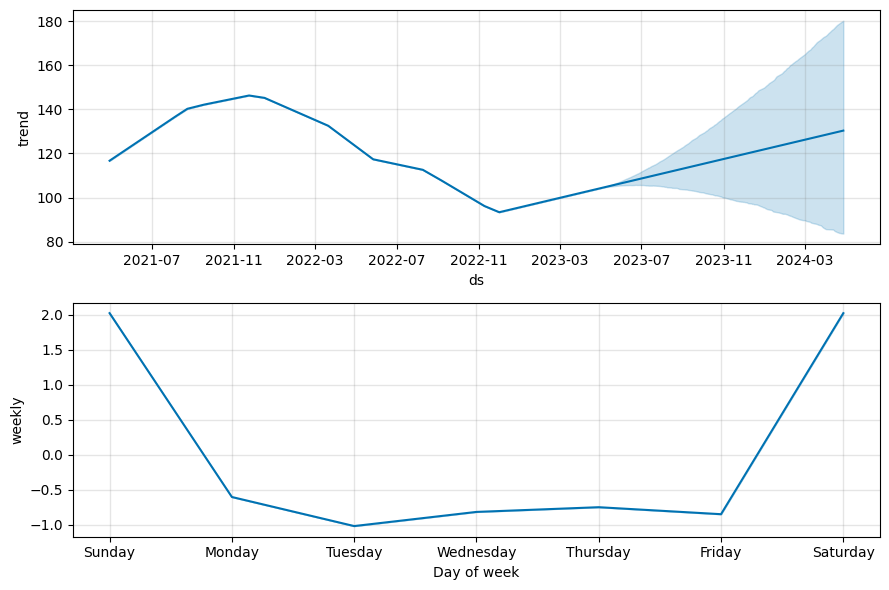

In [ ]:
#plotting model components 
m.plot_components(forecast)

In [ ]:
#creating model with daily seasonality(bad idea)
m_bad = Prophet(daily_seasonality=True)

#fitting model on dataset
m_bad.fit(goog.iloc[-252*2:])

# creating future dataframe
future = m_bad.make_future_dataframe(periods=365)

# Making future predictions
forecast = m_bad.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/kv2sqpwg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/fdeqb6iq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3933', 'data', 'file=/tmp/tmps04dirab/kv2sqpwg.json', 'init=/tmp/tmps04dirab/fdeqb6iq.json', 'output', 'file=/tmp/tmps04dirab/prophet_modelt0r79m8z/prophet_model-20230512041022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:10:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


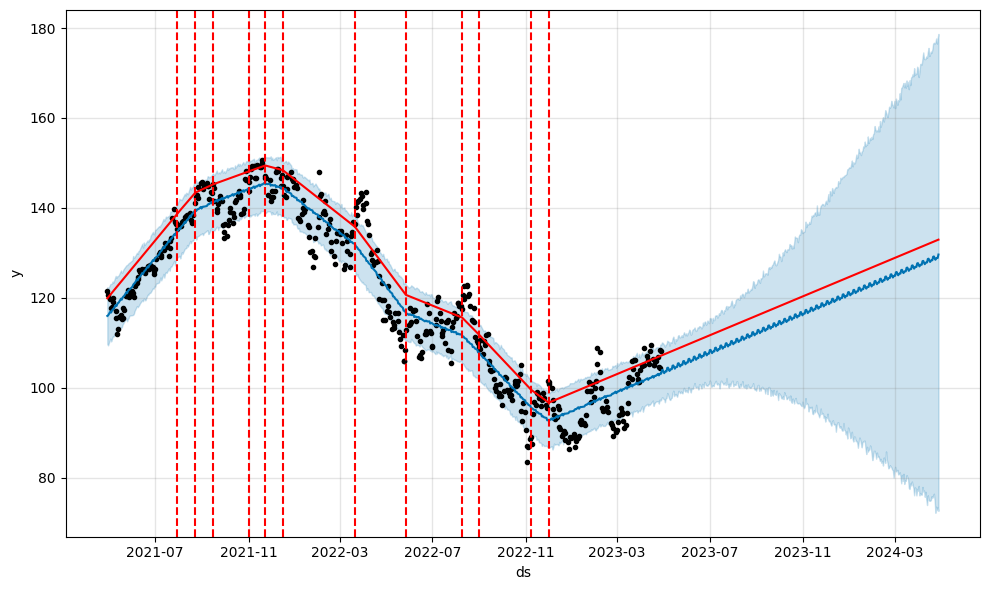

In [ ]:
#plotting forecasted value
fig=m_bad.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m_bad,forecast)

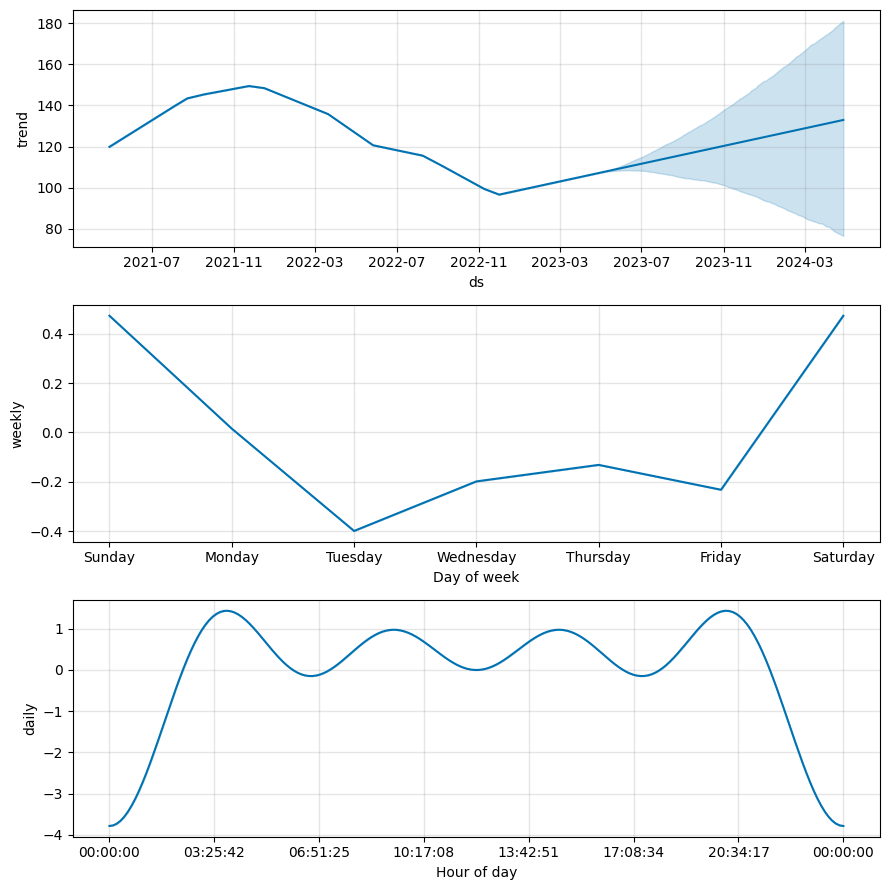

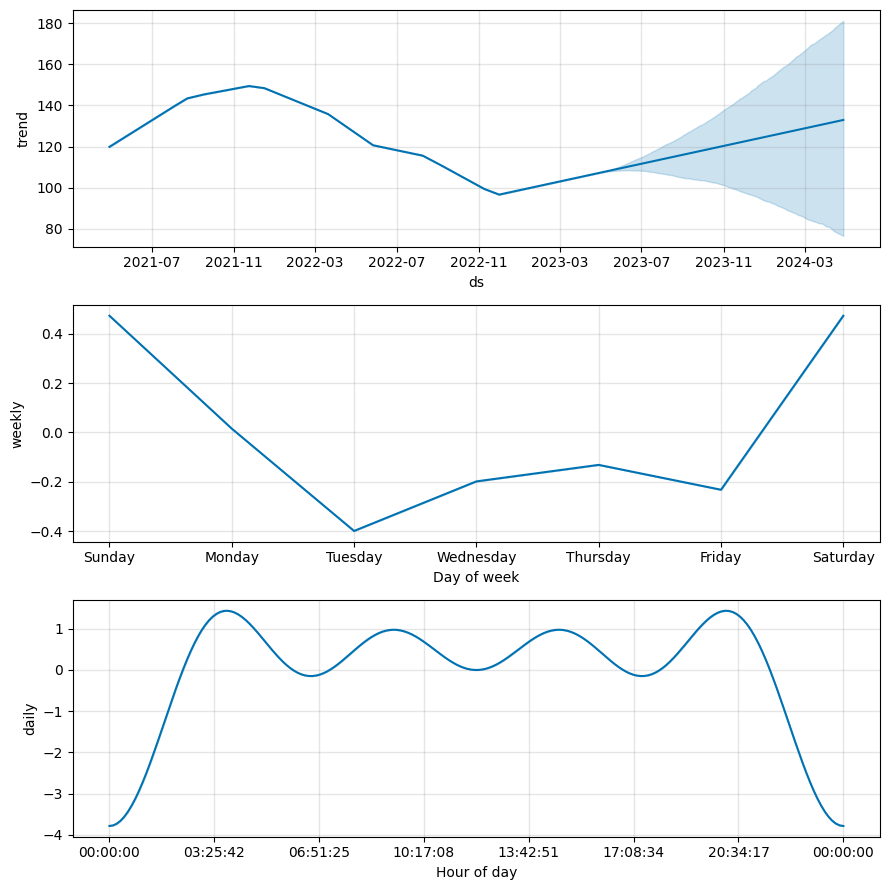

In [ ]:
#plotting model components
m_bad.plot_components(forecast)

* You can see that model is automatically detecting hourly component although we have not provided any hourly data to the model.

In [ ]:
#creating new model with corrected parameters
m1 = Prophet(weekly_seasonality=False)

#fitting model
m1.fit(goog.iloc[-252*2:])

# creating future dataframe
future = m1.make_future_dataframe(periods=365)


# Making  future predictions
forecast = m1.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/f6siqar_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/xt_igarv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38510', 'data', 'file=/tmp/tmps04dirab/f6siqar_.json', 'init=/tmp/tmps04dirab/xt_igarv.json', 'output', 'file=/tmp/tmps04dirab/prophet_modelvbgcux6g/prophet_model-20230512041025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


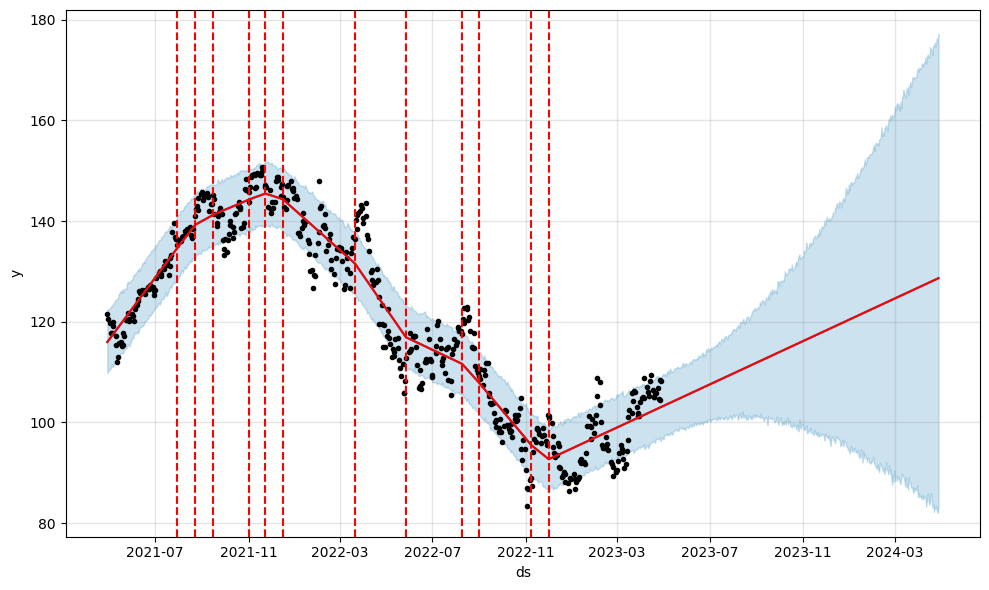

In [ ]:
#plotting forecasted value
fig=m1.plot(forecast)

#plotting change points
a=add_changepoints_to_plot(fig.gca(),m1,forecast)

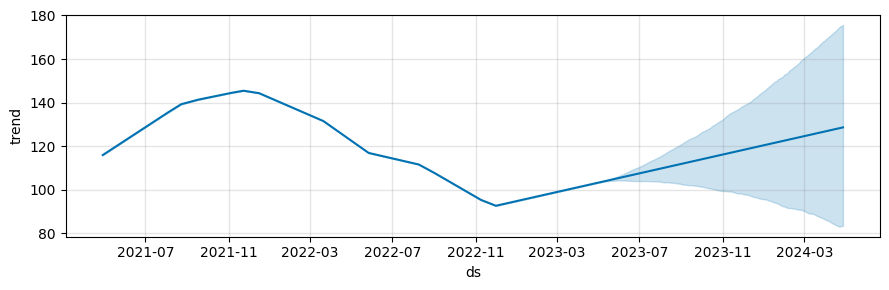

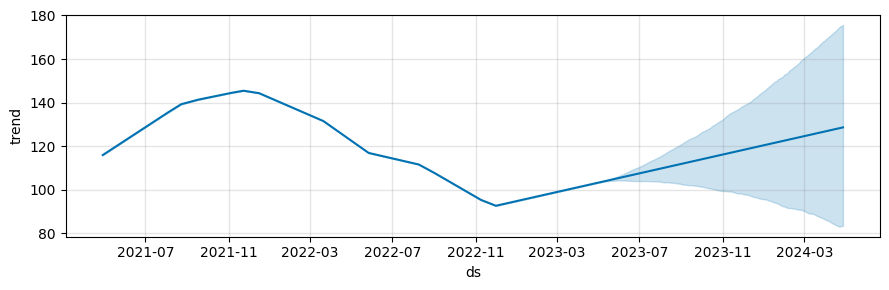

In [ ]:
#plotting model components
m1.plot_components(forecast)

* Now we don't have any false weekly or daily patterns.

#Cross Validation

* We will compare it with baseline naive forecast.

In [ ]:
#standard imports for model  diagnostics and cross validation
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [ ]:
#creating model
m = Prophet(weekly_seasonality=False)

#fitting model
m.fit(goog.iloc[-252*2:])

In [ ]:
#cross validation
df_cv=cross_validation(m,initial='365 days',
                       period='5 days',horizon='5 days')

INFO:prophet:Making 72 forecasts with cutoffs between 2022-05-03 00:00:00 and 2023-04-23 00:00:00


  0%|          | 0/72 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/krvehrg1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/obnlmvj3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33359', 'data', 'file=/tmp/tmps04dirab/krvehrg1.json', 'init=/tmp/tmps04dirab/obnlmvj3.json', 'output', 'file=/tmp/tmps04dirab/prophet_modelu9e5lx5u/prophet_model-20230512041027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:10:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/s08urjle.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/aepixven.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
#cross validation dataframe
df_cv.head(20)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-05-04,126.580976,120.995538,132.498619,122.574997,2022-05-03
1,2022-05-05,126.455753,120.744893,131.968568,116.746498,2022-05-03
2,2022-05-06,126.330530,120.832870,131.643487,115.660004,2022-05-03
3,2022-05-09,124.988426,119.421457,130.567593,113.084000,2022-05-08
4,2022-05-10,124.853483,119.167555,130.513026,114.584503,2022-05-08
5,2022-05-11,124.718540,119.126345,130.409142,113.960999,2022-05-08
6,2022-05-12,124.583597,119.008373,130.391276,113.161003,2022-05-08
7,2022-05-13,124.448654,118.370577,130.099312,116.515503,2022-05-08
8,2022-05-16,120.743096,115.131850,126.479124,114.792503,2022-05-13
9,2022-05-17,120.554253,115.345635,125.965839,116.701500,2022-05-13


In [ ]:
df_cv.shape

(248, 6)

In [ ]:
naive=df_cv[['ds','yhat','y','cutoff']].copy()

In [ ]:
#implementing naive forecast.

#initializing with zeros.We will store all the prediction here.
naive_storage=np.zeros(naive.shape[0])
one_day=pd.Timedelta(1,'day')

#looping through rows and storing cut off date
for i,row in naive.iterrows():
  cutoff=row['cutoff']

  #checking if cutoff date exits in google dataframe
  #if it does not the decrease cutoff date by 1.
  #this loops end when we find date where price exists 
  while cutoff not in goog.index:
    cutoff=cutoff-one_day

  #after finding price we store it .
  naive_storage[i] =goog.loc[cutoff]['y']  

#storing value in dataframe which is our naive forecast
naive['yhat']=naive_storage  

  

In [ ]:
#calling performance metrics on original datadrame 
pm=performance_metrics(df_cv)
pm['smape'].mean()

0.06262282792300176

In [ ]:
#calling performance metrics on naive dataframe
naive_metrics=performance_metrics(naive)
naive_metrics['smape'].mean()

0.029186240575210198

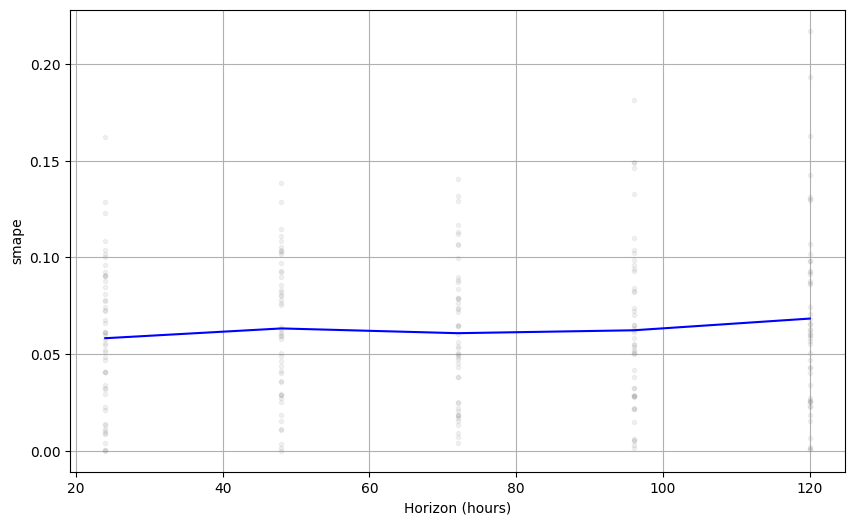

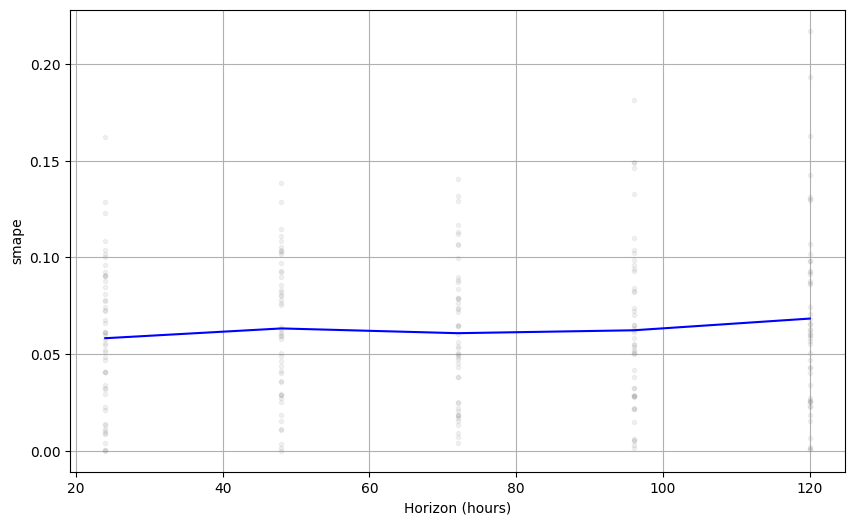

In [ ]:
#plotting cross validation results
plot_cross_validation_metric(df_cv,metric='smape')

<b> Forecast error tends to grow over time.

Repeating all the steps using log prices.

In [53]:
#taking log of y
log_goog=goog.copy()
log_goog['y']=np.log(goog['y'])

In [54]:
#creating instance of model
m = Prophet(weekly_seasonality=False)

#fitting the model
m.fit(log_goog.iloc[-252*2:])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/pn67k2zn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/hr9p7di7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83917', 'data', 'file=/tmp/tmps04dirab/pn67k2zn.json', 'init=/tmp/tmps04dirab/hr9p7di7.json', 'output', 'file=/tmp/tmps04dirab/prophet_model4atxcx4i/prophet_model-20230512050118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:01:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:01:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [55]:
#performing cross validation
df_cv=cross_validation(m,initial='365 days',period='5 days',
                       horizon='5 days')

INFO:prophet:Making 72 forecasts with cutoffs between 2022-05-03 00:00:00 and 2023-04-23 00:00:00


  0%|          | 0/72 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/naoc_cpl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/cykjfmir.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59638', 'data', 'file=/tmp/tmps04dirab/naoc_cpl.json', 'init=/tmp/tmps04dirab/cykjfmir.json', 'output', 'file=/tmp/tmps04dirab/prophet_modelch08fohw/prophet_model-20230512050148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:01:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:01:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/i74qyiux.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps04dirab/xvlwdewk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [56]:
#checking performance
pm=performance_metrics(df_cv)

In [57]:
#computing smape
pm['smape'].mean()

0.012240000410020317

In [58]:
df_cv.head(20)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-05-04,4.834328,4.796214,4.871522,4.808723,2022-05-03
1,2022-05-05,4.833201,4.795097,4.872691,4.760005,2022-05-03
2,2022-05-06,4.832073,4.793637,4.867959,4.750655,2022-05-03
3,2022-05-09,4.815702,4.775412,4.852551,4.728131,2022-05-08
4,2022-05-10,4.814338,4.773601,4.852614,4.741313,2022-05-08
5,2022-05-11,4.812973,4.772797,4.850344,4.735856,2022-05-08
6,2022-05-12,4.811609,4.771472,4.849715,4.728812,2022-05-08
7,2022-05-13,4.810245,4.773161,4.847506,4.758024,2022-05-08
8,2022-05-16,4.776811,4.736966,4.815131,4.743126,2022-05-13
9,2022-05-17,4.774885,4.734827,4.815981,4.759619,2022-05-13


In [62]:
#computing naive forecast
naive_storage=np.zeros(naive.shape[0])
one_day=pd.Timedelta(1,'day')

for i,row in naive.iterrows():
  cutoff=row['cutoff']

  #must find last cutoff that actually exists in df
  while cutoff not in goog.index:
    cutoff=cutoff-one_day

  naive_storage[i] =log_goog.loc[cutoff]['y']  

naive['yhat']=naive_storage  

  

In [63]:
#checking performance
naive_metrics=performance_metrics(naive)

#computing smape
naive_metrics['smape'].mean()

1.8273849217946476

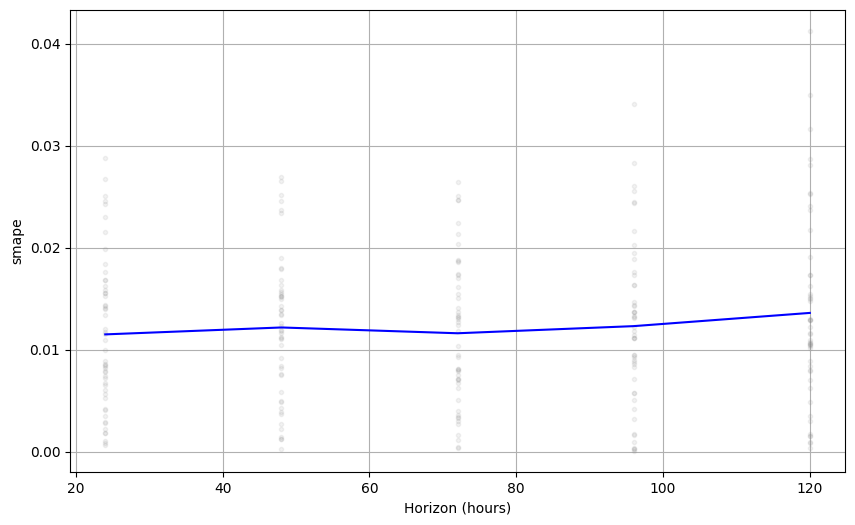

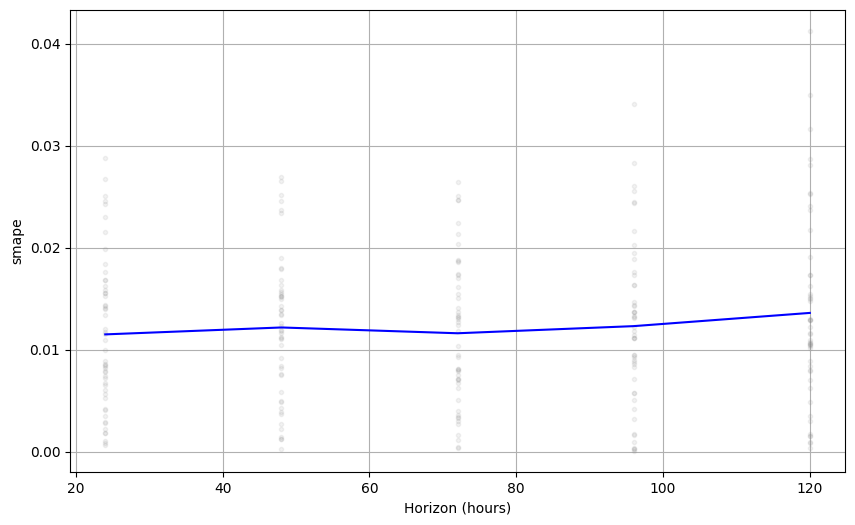

In [61]:
#plotting cross validation results
plot_cross_validation_metric(df_cv,metric='smape')